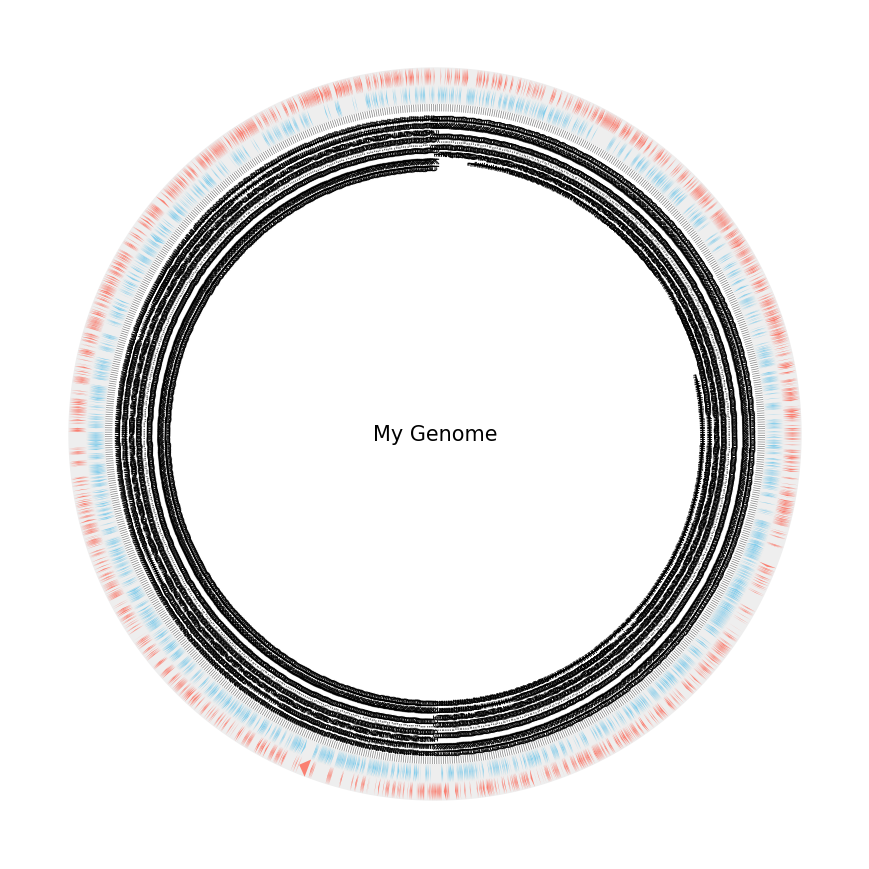

In [8]:
from pycirclize import Circos
from pycirclize.parser import Gff

# Load YOUR genome.gff instead of the example
gff_file = "/projectnb/bf528/students/mmccar53/project1-week3-template-mmccar53-bu/results/annots/genome.gff"
gff = Gff(gff_file)

# Initialize Circos instance
seqid2size = gff.get_seqid2size()   # Get chromosome/contig sizes
space = 0 if len(seqid2size) == 1 else 2  # Add space if multiple contigs
circos = Circos(sectors=seqid2size, space=space)

# Optional title for your genome
circos.text("My Genome", size=15)

# Extract features (example: CDS)
seqid2features = gff.get_seqid2features(feature_type="CDS")

for sector in circos.sectors:
    # Add a track for CDS features
    cds_track = sector.add_track((90, 100))
    cds_track.axis(fc="#EEEEEE", ec="none")

    features = seqid2features.get(sector.name, [])
    for feature in features:
        # Plot CDS features (strand-specific colors)
        if feature.location.strand == 1:
            cds_track.genomic_features(feature, plotstyle="arrow", r_lim=(95, 100), fc="salmon")
        else:
            cds_track.genomic_features(feature, plotstyle="arrow", r_lim=(90, 95), fc="skyblue")

    # Plot xticks every 5kb on inner position
    cds_track.xticks_by_interval(
        interval=5000,
        outer=False,
        label_formatter=lambda v: f"{v / 1000:.1f} Kb",
        label_orientation="vertical",
        line_kws=dict(ec="grey"),
    )

# Render plot
fig = circos.plotfig()




